# 📚 Importando bibliotecas que serão utilizadas

In [21]:
import mplcursors
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import Markdown 

# 📖 Lendo o arquivo csv

In [22]:
DELITOS_BAHIA_DATA_PATH = '05_OUTROS_DELITOS_ESTADO_2022.csv'
seguranca_publica_baiana_df = pd.read_csv(DELITOS_BAHIA_DATA_PATH)
seguranca_publica_baiana_df 

,Unnamed: 0,Unnamed: 1,SECRETARIA DA SEGURANÇA PÚBLICA DO ESTADO DA BAHIA,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,PRINCIPAIS DELITOS\nBAHIA\nPERÍODO: 1/1/2022 A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Qtd de Ocorrências,NaN,NaN,NaN,NaN,Qtd de Pessoas,NaN
2,NaN,NaN,NaN,ROUBO A,ROUBO A,NaN,NaN,NaN,USO/PORTE,NaN,NaN,NaN
3,NaN,NaN,FURTO,ESTABELECIMENTO,ONIBUS,ROUBO A,ROUBO A,ROUBO,SUBSTANCIA,ROUBO,NaN,TENTATIVA
4,ID,MUNICÍPIO,DE,NaN,NaN,NaN,NaN,NaN,NaN,DE,ESTUPRO,DE
...,...,...,...,...,...,...,...,...,...,...,...,...
551,NaN,Total Geral,6.802,2.328,1.069,1.136,51.395,329,3.056,13.292,4.284,2.290
552,Fonte: SSP-BA (Elaborado por SIAP/DAO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,Gerado em 1/6/2023 às 16h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,Estupro = Estupro + Estupro de vulnerável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 🧹 Limpeza dos dados 

In [23]:
seguranca_publica_baiana_df = pd.read_csv(DELITOS_BAHIA_DATA_PATH, skiprows=[0, 1, 2, 3, 4, 5, 6, 7])
seguranca_publica_baiana_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,/SERVIÇOS,RODOVIA),Unnamed: 5,Unnamed: 6,Unnamed: 7,(USUÁRIOS),Unnamed: 9,Unnamed: 10,Unnamed: 11
0,290010,Abaíra,1,0,0,0,3,0,1,1,1,2
1,290020,Abaré,8,0,0,0,4,1,2,7,5,7
2,290030,Acajutiba,1,0,0,0,13,0,0,1,3,2
3,290035,Adustina,3,0,0,0,5,0,2,4,0,1
4,290040,Água Fria,1,0,0,0,5,0,2,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
543,NaN,Total Geral,6.802,2.328,1.069,1.136,51.395,329,3.056,13.292,4.284,2.290
544,Fonte: SSP-BA (Elaborado por SIAP/DAO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,Gerado em 1/6/2023 às 16h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,Estupro = Estupro + Estupro de vulnerável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
seguranca_publica_baiana_df.columns = ['ID', 'Município', 'Furto de veiculo', 'Roubo a estabelecimento comercial/serviços', 'Roubo a onibus (urbano e em rodovia)', 'Roubo a residencia', 'Roubo a transeunte', 'Roubo de carga', 'Uso/porte substancia entorpecente (usuários)', 'Roubo de veiculo', 'Estupro', 'Tentativa de Homicídio']
seguranca_publica_baiana_df

,ID,Município,Furto de veiculo,Roubo a estabelecimento comercial/serviços,Roubo a onibus (urbano e em rodovia),Roubo a residencia,Roubo a transeunte,Roubo de carga,Uso/porte substancia entorpecente (usuários),Roubo de veiculo,Estupro,Tentativa de Homicídio
0,290010,Abaíra,1,0,0,0,3,0,1,1,1,2
1,290020,Abaré,8,0,0,0,4,1,2,7,5,7
2,290030,Acajutiba,1,0,0,0,13,0,0,1,3,2
3,290035,Adustina,3,0,0,0,5,0,2,4,0,1
4,290040,Água Fria,1,0,0,0,5,0,2,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
543,NaN,Total Geral,6.802,2.328,1.069,1.136,51.395,329,3.056,13.292,4.284,2.290
544,Fonte: SSP-BA (Elaborado por SIAP/DAO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,Gerado em 1/6/2023 às 16h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,Estupro = Estupro + Estupro de vulnerável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
valores_numericos = pd.to_numeric(seguranca_publica_baiana_df['Furto de veiculo'], errors = 'coerce').notnull()
seguranca_publica_baiana_df = seguranca_publica_baiana_df[valores_numericos]
seguranca_publica_baiana_df

,ID,Município,Furto de veiculo,Roubo a estabelecimento comercial/serviços,Roubo a onibus (urbano e em rodovia),Roubo a residencia,Roubo a transeunte,Roubo de carga,Uso/porte substancia entorpecente (usuários),Roubo de veiculo,Estupro,Tentativa de Homicídio
0,290010,Abaíra,1,0,0,0,3,0,1,1,1,2
1,290020,Abaré,8,0,0,0,4,1,2,7,5,7
2,290030,Acajutiba,1,0,0,0,13,0,0,1,3,2
3,290035,Adustina,3,0,0,0,5,0,2,4,0,1
4,290040,Água Fria,1,0,0,0,5,0,2,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
539,293340,Wagner,2,0,0,0,4,0,0,0,2,1
540,293345,Wanderley,2,0,0,0,2,0,0,3,7,2
541,293350,Wenceslau Guimarães,4,0,0,0,19,0,5,12,8,4
542,293360,Xique-Xique,9,0,0,0,67,0,4,1,12,14


In [26]:
seguranca_publica_baiana_df.loc[543, 'ID'] = 'Valor'
seguranca_publica_baiana_df

C:\Users\gabri\AppData\Local\Temp\ipykernel_9256\450739862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seguranca_publica_baiana_df.loc[543, 'ID'] = 'Valor'


,ID,Município,Furto de veiculo,Roubo a estabelecimento comercial/serviços,Roubo a onibus (urbano e em rodovia),Roubo a residencia,Roubo a transeunte,Roubo de carga,Uso/porte substancia entorpecente (usuários),Roubo de veiculo,Estupro,Tentativa de Homicídio
0,290010,Abaíra,1,0,0,0,3,0,1,1,1,2
1,290020,Abaré,8,0,0,0,4,1,2,7,5,7
2,290030,Acajutiba,1,0,0,0,13,0,0,1,3,2
3,290035,Adustina,3,0,0,0,5,0,2,4,0,1
4,290040,Água Fria,1,0,0,0,5,0,2,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
539,293340,Wagner,2,0,0,0,4,0,0,0,2,1
540,293345,Wanderley,2,0,0,0,2,0,0,3,7,2
541,293350,Wenceslau Guimarães,4,0,0,0,19,0,5,12,8,4
542,293360,Xique-Xique,9,0,0,0,67,0,4,1,12,14


# 🔍 Análise exploratória

## 👓 Visão geral dos dados 

In [27]:
municipio_repetido = seguranca_publica_baiana_df['Município'].duplicated().any()

if municipio_repetido:
  display(Markdown("### **Há** municípios repetidos."))
else:
  display(Markdown("### **Não** há municípios repetidos."))

### **Não** há municípios repetidos.

In [28]:
seguranca_publica_baiana_df.shape

(418, 12)

In [29]:
seguranca_publica_baiana_df.dtypes

ID                                              object
Município                                       object
Furto de veiculo                                object
Roubo a estabelecimento comercial/serviços      object
Roubo a onibus (urbano e em rodovia)            object
Roubo a residencia                              object
Roubo a transeunte                              object
Roubo de carga                                  object
Uso/porte substancia entorpecente (usuários)    object
Roubo de veiculo                                object
Estupro                                         object
Tentativa de Homicídio                          object
dtype: object

## Quais são os crimes mais comuns? 

In [30]:
for coluna in seguranca_publica_baiana_df.columns:
    if coluna != 'Município':
        seguranca_publica_baiana_df[coluna] = seguranca_publica_baiana_df[coluna].astype(str)  
        seguranca_publica_baiana_df[coluna] = seguranca_publica_baiana_df[coluna].str.replace('.', '')  
        seguranca_publica_baiana_df[coluna] = pd.to_numeric(seguranca_publica_baiana_df[coluna], errors='coerce')  
print(seguranca_publica_baiana_df.dtypes)

ID                                              float64
Município                                        object
Furto de veiculo                                  int64
Roubo a estabelecimento comercial/serviços        int64
Roubo a onibus (urbano e em rodovia)              int64
Roubo a residencia                                int64
Roubo a transeunte                                int64
Roubo de carga                                    int64
Uso/porte substancia entorpecente (usuários)      int64
Roubo de veiculo                                  int64
Estupro                                           int64
Tentativa de Homicídio                            int64
dtype: object


C:\Users\gabri\AppData\Local\Temp\ipykernel_9256\3910100405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seguranca_publica_baiana_df[coluna] = seguranca_publica_baiana_df[coluna].astype(str)
C:\Users\gabri\AppData\Local\Temp\ipykernel_9256\3910100405.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  seguranca_publica_baiana_df[coluna] = seguranca_publica_baiana_df[coluna].str.replace('.', '')
C:\Users\gabri\AppData\Local\Temp\ipykernel_9256\3910100405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [31]:
valor_total_geral = seguranca_publica_baiana_df.loc[543]
valor_total_geral

ID                                                      NaN
Município                                       Total Geral
Furto de veiculo                                       6802
Roubo a estabelecimento comercial/serviços             2328
Roubo a onibus (urbano e em rodovia)                   1069
Roubo a residencia                                     1136
Roubo a transeunte                                    51395
Roubo de carga                                          329
Uso/porte substancia entorpecente (usuários)           3056
Roubo de veiculo                                      13292
Estupro                                                4284
Tentativa de Homicídio                                 2290
Name: 543, dtype: object

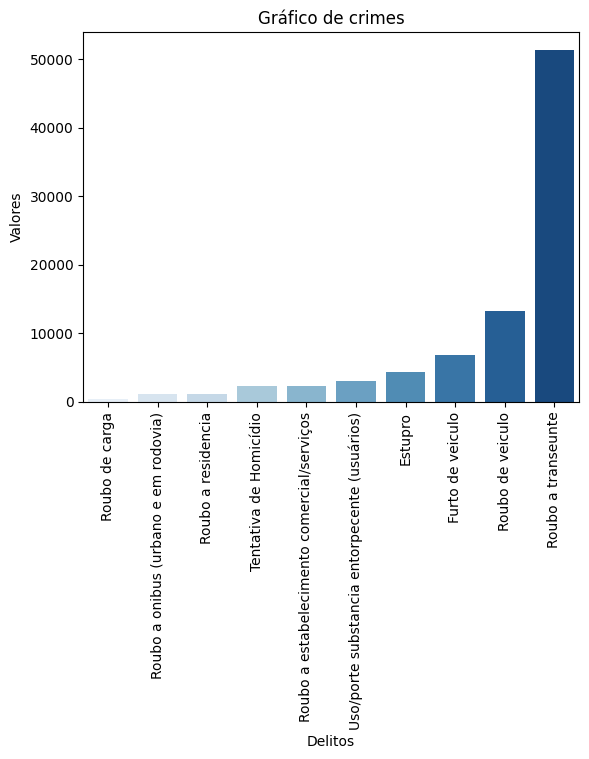

In [32]:
valor_total_geral = (seguranca_publica_baiana_df.loc[543])[2:]
df_plot = pd.DataFrame({'Delitos': seguranca_publica_baiana_df.columns[2:], 'Valores': valor_total_geral})
df_plot = df_plot.sort_values(by='Valores')
sns.barplot(x='Delitos', y='Valores', data=df_plot, palette='Blues')
plt.title('Gráfico de crimes')
plt.xticks(rotation=90)
plt.show()

### Os **crimes mais comuns** no estado da Bahia no ano de 2022 foram:
- **Roubo a transeunte** (51.395 casos);
- **Roubo de veiculo** (13.292 casos);
- **Furto de veiculo** (6.802 casos). 

## Quais municípios lideram o ranking de delitos citados na resposta da questão anterior (Roubo a transeunte, Roubo de veiculo, Furto de veiculo)?

In [33]:
valor = seguranca_publica_baiana_df.iloc[:-1]['Roubo a transeunte']
indice_maximo = valor.idxmax()
municipio = seguranca_publica_baiana_df.loc[indice_maximo, 'Município']
print("Quantidade de casos:", valor.max())
print("Município:", municipio)

Quantidade de casos: 28570
Município: Salvador


In [34]:
valor = seguranca_publica_baiana_df.iloc[:-1]['Roubo de veiculo']
indice_maximo = valor.idxmax()
municipio = seguranca_publica_baiana_df.loc[indice_maximo, 'Município']
print("Quantidade de casos:", valor.max())
print("Município:", municipio)

Quantidade de casos: 5483
Município: Salvador


In [35]:
valor = seguranca_publica_baiana_df.iloc[:-1]['Furto de veiculo']
indice_maximo = valor.idxmax()
municipio = seguranca_publica_baiana_df.loc[indice_maximo, 'Município']
print("Quantidade de casos:", valor.max())
print("Município:", municipio)

Quantidade de casos: 2031
Município: Salvador


### Dessa forma, é notório que a **capital soteropolitana** é a cidade vítima dos delitos mais ocorridos na Bahia em 2022. 

## Quais são as cidades com os maiores índices criminais?

In [36]:
if 'Soma' not in seguranca_publica_baiana_df.columns:
  seguranca_publica_baiana_df["Soma"] = seguranca_publica_baiana_df.iloc[:, 2:].sum(axis=1)
seguranca_publica_baiana_df.at[seguranca_publica_baiana_df.index[-1], "Soma"] = np.nan
maiores_indices = seguranca_publica_baiana_df.sort_values(by="Soma", ascending=False)
ranking_cidades = maiores_indices.head(418)
ranking_cidades

C:\Users\gabri\AppData\Local\Temp\ipykernel_9256\166410042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seguranca_publica_baiana_df["Soma"] = seguranca_publica_baiana_df.iloc[:, 2:].sum(axis=1)


,ID,Município,Furto de veiculo,Roubo a estabelecimento comercial/serviços,Roubo a onibus (urbano e em rodovia),Roubo a residencia,Roubo a transeunte,Roubo de carga,Uso/porte substancia entorpecente (usuários),Roubo de veiculo,Estupro,Tentativa de Homicídio,Soma
434,292740.0,Salvador,2031,1569,818,611,28570,151,575,5483,567,256,40631.0
166,291080.0,Feira De Santana,520,116,12,117,3231,9,133,1274,178,87,5677.0
293,291920.0,Lauro De Freitas,135,222,55,42,2329,10,65,848,44,28,3778.0
87,290570.0,Camaçari,210,123,43,66,1724,3,63,905,79,35,3251.0
484,293070.0,Simões Filho,91,31,48,11,1052,30,35,541,32,10,1881.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,290450.0,Brotas De Macaúbas,0,0,0,0,0,0,1,0,0,0,1.0
91,290610.0,Canápolis,0,0,0,0,0,0,0,0,0,1,1.0
213,291410.0,Ipupiara,0,0,0,0,0,0,1,0,0,0,1.0
5,290060.0,Aiquara,0,0,0,0,0,0,0,0,0,0,0.0


## Qual a ordem dos municípios que ocorreram mais crimes?

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and

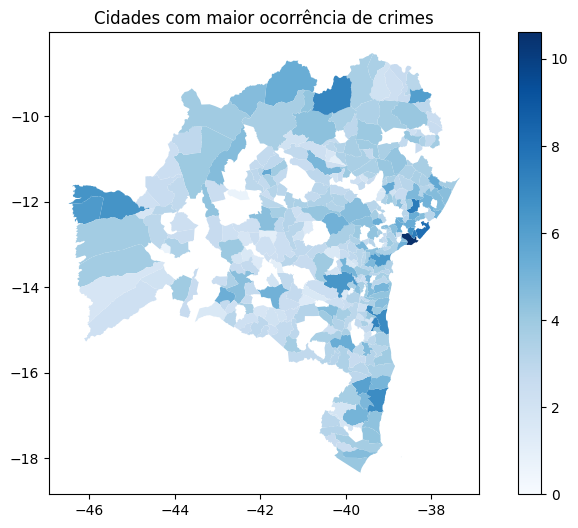

In [43]:
shapefile = 'gdf/BA_Municipios_2022.shp'
gdf = gpd.read_file(shapefile)
merged = gdf.merge(seguranca_publica_baiana_df, left_on = 'NM_MUN', right_on = 'Município')
merged['Soma_log'] = np.log1p(merged['Soma'])
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
plot = merged.plot(column='Soma_log', ax=ax, legend=True, cmap='Blues')
ax.set_title("Cidades com maior ocorrência de crimes")
plt.show()